A multinational bank is aiming to increase its market share in Europe. Recently, the number of customers using it's banking services has declined, and the bank is worried that existing customers have stopped using them as their main bank. This project is tasked with finding out the reasons behind the customer churn and predicting future customer churn. The marketing team is interested in the findings and wants to better understand existing customer behavior and possibly predict future customer churn. The project's results will help the marketing team to use their budget wisely to target potential churners.

Google Data Studio Dashboard

https://datastudio.google.com/reporting/3ce77a44-587b-4682-8ea5-91e652e956d7

Streamlit link

https://share.streamlit.io/taylorec/marketing_analytics_bank_customer_churn/main/Bank_Churn.py

In [ ]:
# Removes Warnings
import warnings
warnings.filterwarnings('ignore')
#import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Marketing-Analytics/Data/Churn_Modelling.csv')
data.head(5)

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.000,1,1,1,91213.992,1
1,15647311,608,Spain,Female,41.0,1,75427.074,1,0,1,101288.322,0
2,15619304,502,France,Female,42.0,8,143694.720,3,1,0,102538.413,1
3,15701354,699,France,Female,39.0,1,0.000,2,0,0,84443.967,0
4,15737888,850,Spain,Female,43.0,2,112959.738,1,1,1,71175.690,0


In [ ]:
len(data)

10000

In [ ]:
data.shape

(10000, 12)

## Scrubbing the data

In [ ]:
data.isnull().values.any()

True

In [ ]:
#check for missing values

data.isnull().any()

# there are missing values in Gender, Age and EstimatedSalary

CustomerId         False
CredRate           False
Geography          False
Gender              True
Age                 True
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
data[["EstimatedSalary","Age"]].describe()

,EstimatedSalary,Age
count,10000.000000,9994.000000
mean,90031.242766,38.925255
std,51785.172134,10.489248
min,0.000000,18.000000
25%,45817.220250,32.000000
50%,90120.892500,37.000000
75%,134443.887750,44.000000
max,179993.232000,92.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           9996 non-null   object 
 4   Age              9994 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [ ]:
data.describe()

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,68837.300359,1.530200,0.70550,0.515100,90031.242766,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,56157.664682,0.581654,0.45584,0.499797,51785.172134,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,45817.220250,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,87478.686000,1.000000,1.00000,1.000000,90120.892500,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,114879.816000,2.000000,1.00000,1.000000,134443.887750,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,225808.281000,4.000000,1.00000,1.000000,179993.232000,1.000000


In [ ]:
data.describe(include='object')

,Geography,Gender
count,10000,9996
unique,3,2
top,France,Male
freq,5014,5453


In [ ]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [ ]:
data['Prod Number'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Prod Number, dtype: int64

In [ ]:
# Number of missing Values present
data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Percentage of missing Values present
round(data.isnull().sum()/len(data)*100,2)

CustomerId         0.00
CredRate           0.00
Geography          0.00
Gender             0.04
Age                0.06
Tenure             0.00
Balance            0.00
Prod Number        0.00
HasCrCard          0.00
ActMem             0.00
EstimatedSalary    0.00
Exited             0.00
dtype: float64

In [ ]:
# Checking the datatype of the missing columns
data[["Gender","Age","EstimatedSalary"]].dtypes

Gender              object
Age                float64
EstimatedSalary    float64
dtype: object

In [ ]:
# fill EstimatedSalary missing values with mean
mean_value=data['EstimatedSalary'].mean() 
data['EstimatedSalary']=data['EstimatedSalary'].fillna(mean_value) 

In [ ]:
data['Gender'].value_counts()

Male      5453
Female    4543
Name: Gender, dtype: int64

In [ ]:
# fill Gender missing values with mode
data['Gender']=data['Gender'].fillna(data['Gender'].value_counts().idxmax()) 

In [ ]:
# fill Age missing values with mode
mode_value=data['Age'].mode()
data['Age']=data['Age'].fillna(mode_value[0])

In [ ]:
#check for any missing values

data.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool

### Rename a few columns

In [ ]:
data = data.rename(columns={'CredRate': 'CreditScore',\
                            'ActMem' : 'IsActiveMember',\
                            'Prod Number': 'NumOfProducts',\
                            'Exited':'Churn'}) 
data.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

In [ ]:
# move the churn columnn to the extreme right and drop the customer ID

data.drop(labels=['CustomerId'], axis=1,inplace = True)

In [ ]:
column_churn = data['Churn']
data.drop(labels=['Churn'], axis=1,inplace = True)
data.insert(len(data.columns), 'Churn', column_churn.values)

In [ ]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

### Changing data types

In [ ]:
data["Geography"] = data["Geography"].astype('category') 
data["Gender"] = data["Gender"].astype('category') 
data["HasCrCard"] = data["HasCrCard"].astype('category') 
data["Churn"] = data["Churn"].astype('category') 
data["IsActiveMember"] = data["IsActiveMember"].astype('category') 

In [ ]:
data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

# Exploring the data

## Statistical Overview

In [ ]:
data['Churn'].value_counts(0)

0    7963
1    2037
Name: Churn, dtype: int64

In [ ]:
data['Churn'].value_counts(1)*100

0    79.63
1    20.37
Name: Churn, dtype: float64

In [ ]:
data['IsActiveMember'].value_counts(1)*100

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

In [ ]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.924100,5.012800,68837.300359,1.530200,90031.242766
std,96.653299,10.486207,2.892174,56157.664682,0.581654,51785.172134
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,45817.220250
50%,652.000000,37.000000,5.000000,87478.686000,1.000000,90120.892500
75%,718.000000,44.000000,7.000000,114879.816000,2.000000,134443.887750
max,850.000000,92.000000,10.000000,225808.281000,4.000000,179993.232000


In [ ]:
summary_churn = data.groupby('Churn')
summary_churn.mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,
0,651.853196,37.411277,5.033279,65470.767101,1.544267,89701.795937
1,645.351497,44.837997,4.932744,81997.685404,1.475209,91319.109778


In [ ]:
summary_churn.median()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Churn,,,,,,
0,653.0,36.0,5.0,82865.412,2.0,89555.175
1,646.0,45.0,5.0,98414.361,1.0,92214.756


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.004179,0.000842,0.006268,0.012238,-0.001077
Age,-0.004179,1.000000,-0.009996,0.028141,-0.030590,-0.006850
Tenure,0.000842,-0.009996,1.000000,-0.012254,0.013444,0.006384
Balance,0.006268,0.028141,-0.012254,1.000000,-0.304180,0.013974
NumOfProducts,0.012238,-0.030590,0.013444,-0.304180,1.000000,0.013861
EstimatedSalary,-0.001077,-0.006850,0.006384,0.013974,0.013861,1.000000


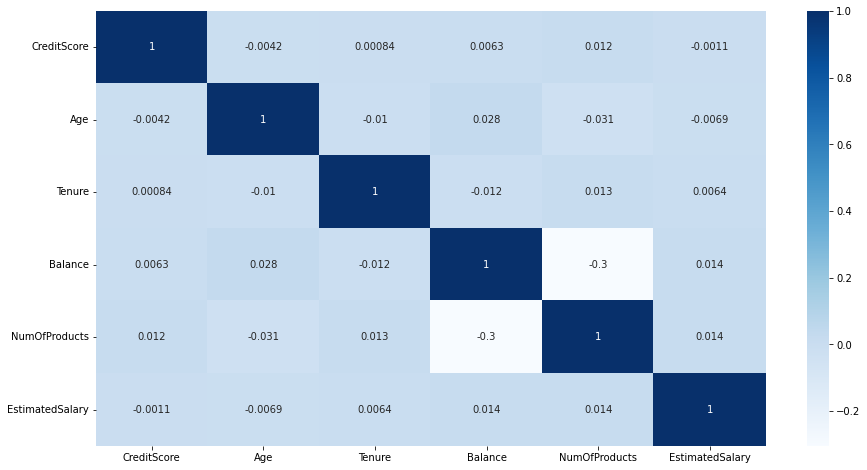

In [ ]:
corr = data.corr() 
plt.figure(figsize=(15,8)) 
sns.heatmap(corr, \
            xticklabels=corr.columns.values,\
            yticklabels=corr.columns.values,\
            annot=True,cmap='Blues') 
corr 

## Visualization

Text(0, 0.5, 'No of Customers')

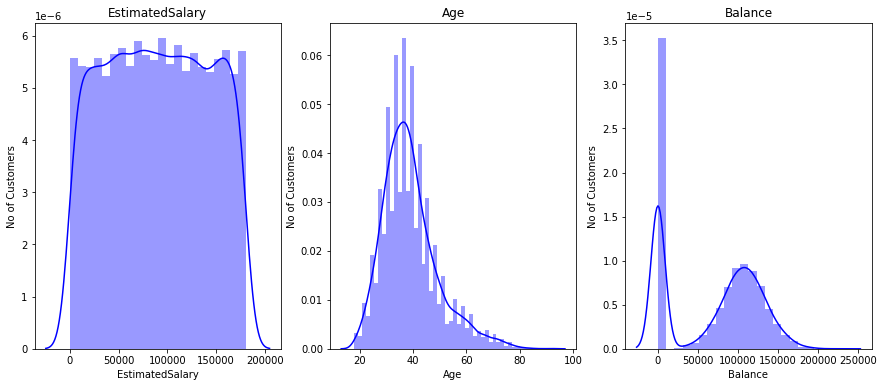

In [ ]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6)) 

sns.distplot(data.EstimatedSalary, kde=True, color="blue", \
             ax=axes[0]).set_title('EstimatedSalary') 
axes[0].set_ylabel('No of Customers') 

sns.distplot(data.Age, kde=True, color="blue", \
             ax=axes[1]).set_title('Age') 
axes[1].set_ylabel('No of Customers') 

sns.distplot(data.Balance, kde=True, color="blue", \
             ax=axes[2]).set_title('Balance') 
axes[2].set_ylabel('No of Customers')

Text(0.5, 1.0, 'Customer Churn Distribution by Gender')

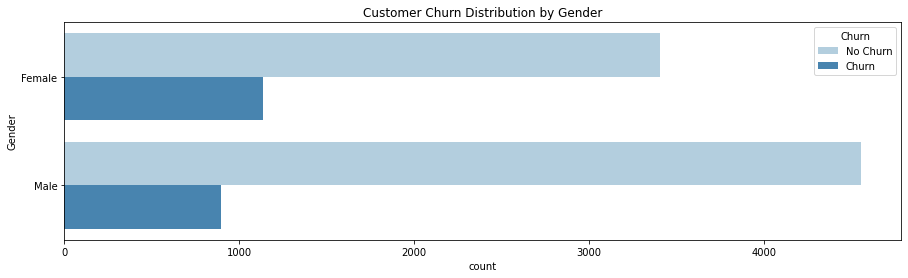

In [ ]:
plt.figure(figsize=(15,4)) 
p=sns.countplot(y="Gender", hue='Churn', data=data, palette="Blues") 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Churn Distribution by Gender')

Text(0.5, 1.0, 'Customer Geography Distribution')

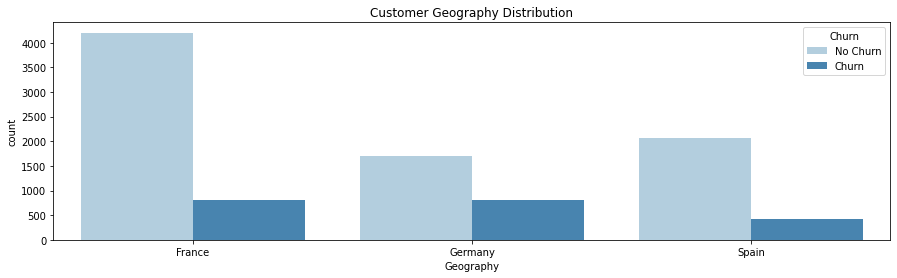

In [ ]:
plt.figure(figsize=(15,4)) 
p=sns.countplot(x='Geography', hue='Churn', data=data, palette="Blues") 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Geography Distribution')

Text(0.5, 1.0, 'Customer Distribution by Product')

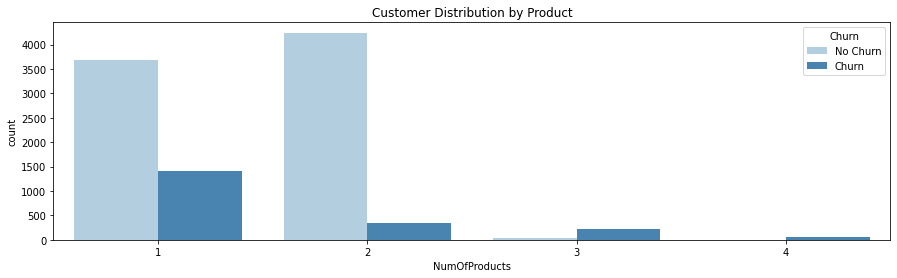

In [ ]:
plt.figure(figsize=(15,4)) 
p=sns.countplot(x='NumOfProducts', hue='Churn', data=data, palette="Blues") 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Customer Distribution by Product')

Text(0.5, 1.0, 'Customer Age - churn vs no churn')

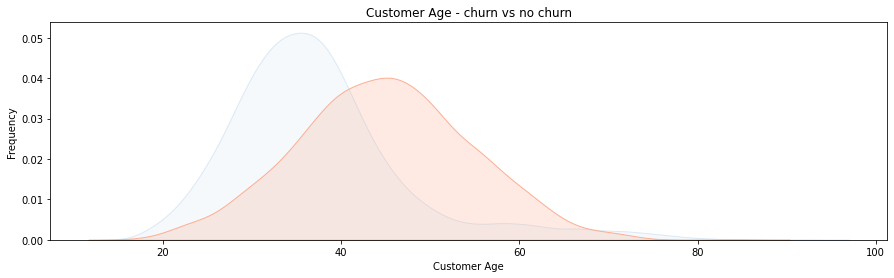

In [ ]:
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'Age'] , \
               color=sns.color_palette("Blues")[0],\
               shade=True,label='no churn') 
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'Age'] , \
               color=sns.color_palette("Reds")[1],\
               shade=True, label='churn') 
ax.set(xlabel='Customer Age', ylabel='Frequency') 
plt.title('Customer Age - churn vs no churn') 

Text(0.5, 1.0, 'Customer Balance - churn vs no churn')

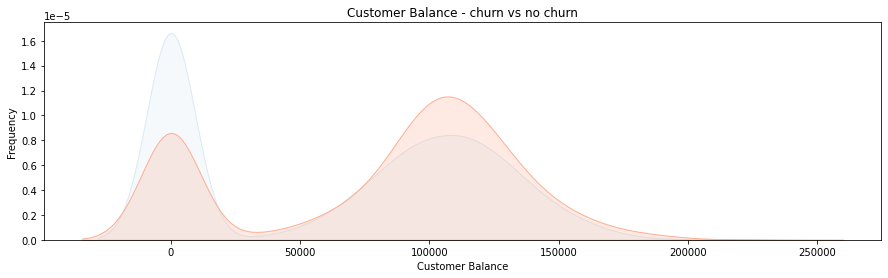

In [ ]:
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'Balance'] , \
               color=sns.color_palette("Blues")[0],\
               shade=True,label='no churn') 
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'Balance'] , \
               color=sns.color_palette("Reds")[1],\
               shade=True, label='churn') 
ax.set(xlabel='Customer Balance', ylabel='Frequency') 
plt.title('Customer Balance - churn vs no churn')

Text(0.5, 1.0, 'Customer CreditScore - churn vs no churn')

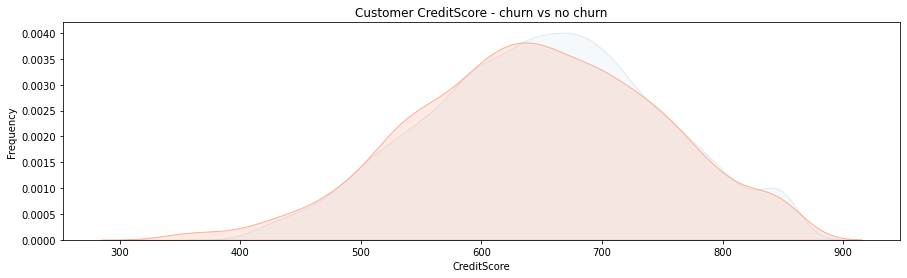

In [ ]:
plt.figure(figsize=(15,4)) 
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'CreditScore'] , \
               color=sns.color_palette("Blues")[0],\
               shade=True,label='no churn') 
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'CreditScore'] , \
               color=sns.color_palette("Reds")[1],\
               shade=True, label='churn') 
ax.set(xlabel='CreditScore', ylabel='Frequency') 
plt.title('Customer CreditScore - churn vs no churn') 

Text(0.5, 1.0, 'Number of Product VS Balance')

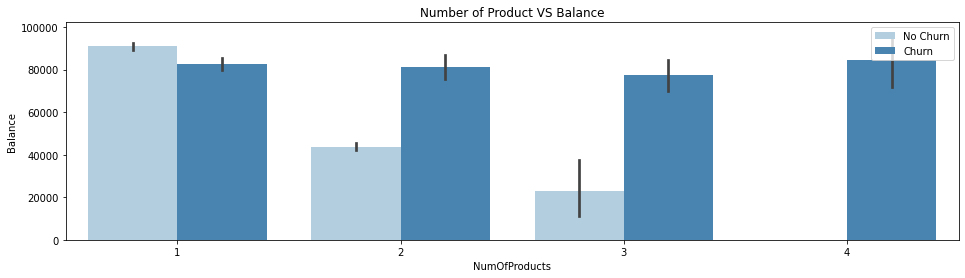

In [ ]:
plt.figure(figsize=(16,4)) 
p=sns.barplot(x='NumOfProducts',y='Balance',hue='Churn', data=data, palette="Blues") 
p.legend(loc='upper right') 
legend = p.get_legend() 
legend_txt = legend.texts 
legend_txt[0].set_text("No Churn") 
legend_txt[1].set_text("Churn") 
p.set_title('Number of Product VS Balance')

## Save data to GCS bucket

In [ ]:
project_id = 'sixth-flag-316719'

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
Data_Studio_df = data.copy()

Data_Studio_df.to_csv('Churn_data.csv')

!gcloud config set project {project_id}

import uuid

bucket_name = 'marketing_data_analytics'

!gsutil mb gs://{bucket_name}

!gsutil cp Churn_data.csv gs://{bucket_name}/

Updated property [core/project].
Creating gs://marketing_data_analytics/...
ServiceException: 409 A Cloud Storage bucket named 'marketing_data_analytics' already exists. Try another name. Bucket names must be globally unique across all Google Cloud projects, including those outside of your organization.
Copying file://Churn_data.csv [Content-Type=text/csv]...
/ [1 files][539.8 KiB/539.8 KiB]                                                
Operation completed over 1 objects/539.8 KiB.                                    


## Feature selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Churn              category
dtype: object

In [ ]:
# Encoding the categorical variables
data["Geography"] = data["Geography"].astype('category').cat.codes
data["Gender"] = data["Gender"].astype('category').cat.codes
data["HasCrCard"] = data["HasCrCard"].astype('category').cat.codes
data["Churn"] = data["Churn"].astype('category').cat.codes

In [ ]:
target = 'Churn'
X = data.drop('Churn', axis=1)
y=data[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y) 

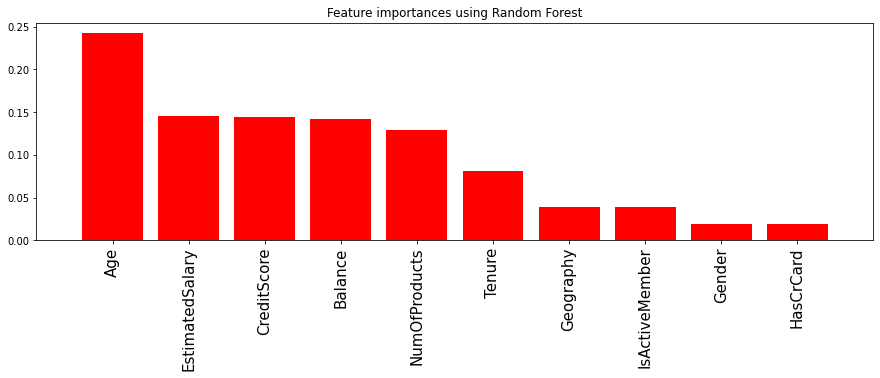

In [ ]:
forest=RandomForestClassifier(n_estimators=500,random_state=1)

forest.fit(X_train,y_train)

importances=forest.feature_importances_
features = data.drop(['Churn'],axis=1).columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,4)) 
plt.title("Feature importances using Random Forest") 
plt.bar(range(X_train.shape[1]), importances[indices], color="red", align="center") 
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical',fontsize=15) 
plt.xlim([-1, X_train.shape[1]])
plt.show() 

In [ ]:
feature_importance_df = pd.DataFrame({"Feature":features, "Importance":importances})

In [ ]:
print(feature_importance_df)

           Feature  Importance
0      CreditScore    0.143877
1        Geography    0.038514
2           Gender    0.019178
3              Age    0.242424
4           Tenure    0.081406
5          Balance    0.142313
6    NumOfProducts    0.128778
7        HasCrCard    0.019003
8   IsActiveMember    0.038450
9  EstimatedSalary    0.146056


## Model Fitting

In [ ]:
import statsmodels.api as sm 

top5_features = ['Age','EstimatedSalary','CreditScore', 'Balance','NumOfProducts'] 
logReg = sm.Logit(y_train, X_train[top5_features]) 
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.472890
         Iterations 6


In [ ]:
logistic_regression.summary
logistic_regression.params

Age                0.048330
EstimatedSalary   -0.000001
CreditScore       -0.004472
Balance            0.000003
NumOfProducts     -0.361871
dtype: float64

In [ ]:
# Create function to compute coefficients
coef = logistic_regression.params
def y (coef, Age, EstimatedSalary, CreditScore, Balance, \
       NumOfProducts) : return coef[0]*Age+ coef[1]*EstimatedSalary+coef[2]*CreditScore\
+coef[1]*Balance+coef[2]*NumOfProducts

In [ ]:
import numpy as np

#A customer having below attributes
#Age: 50
#EstimatedSalary: 100,000 
#CreditScore: 600
#Balance: 100,000
#NumOfProducts: 2
#would have 38% chance of churn

y1 = y(coef, 50, 100000, 600,100000,2)
p = np.exp(y1) / (1+np.exp(y1))
p

0.3774057854451188

## Logistic regression with scikit-learn

**Logistic Regression**

Logistic Regression model outputs a probability $p(X)$ between 0 and 1 for all values of $x \in X$. 


$logistic function: p(X) = \frac{e^{B_0 + B_1X}}{1 + e^{B_0 + B_1X}} $
 * sigmoid function with output range of [0,1]


odds: $ \frac{p(X)}{1-p(X)} = e^{B_0+B_1X}$
 * output range is [0, ∞]

$logit$ or log-odds: $ \log(\frac{p(X)}{1-p(X)}) = {B_0+B_1X} $
 * output range is between [-∞, ∞] and is used for regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train[top5_features], y_train) 

In [ ]:
clf.predict(X_test[top5_features])

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [ ]:
clf.predict_proba(X_test[top5_features])

array([[0.82177584, 0.17822416],
       [0.80895166, 0.19104834],
       [0.73575558, 0.26424442],
       ...,
       [0.78991016, 0.21008984],
       [0.76252692, 0.23747308],
       [0.77674573, 0.22325427]])

In [ ]:
clf.score(X_test[top5_features], y_test)

0.796

# Standardization

$ x^i (std) = \frac{x^i - \mu_x}{\sigma_x} $

 * $x^i$ - input data
 * $ \mu_x $ - mean
 * $\sigma_x$ - standard deviation

In [ ]:
from sklearn import preprocessing

In [ ]:
X_train[top5_features].head()

,Age,EstimatedSalary,CreditScore,Balance,NumOfProducts
490,29.0,176720.553,591,87787.116,1
5555,39.0,147617.082,614,0.000,2
9235,27.0,72528.543,462,159222.168,1
6594,40.0,52036.056,747,0.000,1
6671,49.0,169030.539,677,0.000,2


In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train[top5_features])

In [ ]:
scaler.mean_

array([3.89098824e+01, 9.01231274e+04, 6.49955882e+02, 6.85270907e+04,
       1.52882353e+00])

In [ ]:
scaler.scale_    

array([1.03706201e+01, 5.17377724e+04, 9.64815072e+01, 5.61863099e+04,
       5.80460085e-01])

In [ ]:
X_train_scalar=scaler.transform(X_train[top5_features])

In [ ]:
X_train_scalar

array([[-0.95557279,  1.67377569, -0.61105889,  0.34278858, -0.91104202],
       [ 0.00868971,  1.11125686, -0.37267123, -1.21964035,  0.81172932],
       [-1.14842529, -0.34007232, -1.94810268,  1.61418462, -0.91104202],
       ...,
       [-0.56986779, -0.72501563,  0.36322108, -1.21964035, -0.91104202],
       [-0.37701529, -1.46967036,  0.91254915, -1.21964035, -0.91104202],
       [-0.08773654, -0.55741133, -1.11892823, -0.16336821, -0.91104202]])

In [ ]:
X_test_scalar=scaler.transform(X_test[top5_features])

# Scaling

$ x^i (norm) = \frac{x^i - x_{min}}{x_{max}-x_{min}} $

 * $ x^i $ - input data
 * $ x_{min} $ - minimum value of the feature
 * $ x_{max} $ - maximum value of the feature

In [ ]:
min_max = preprocessing.MinMaxScaler().fit(X_train[top5_features])

In [ ]:
min_max.min_

array([-0.24324324,  0.        , -0.7       ,  0.        , -0.33333333])

In [ ]:
min_max.scale_    

array([1.35135135e-02, 5.55576445e-06, 2.00000000e-03, 4.42853555e-06,
       3.33333333e-01])

In [ ]:
X_train_min_max=min_max.transform(X_train[top5_features])

In [ ]:
X_test_min_max=min_max.transform(X_test[top5_features])  

# Normalization

L1 Norm: $ ||x||_1 = \sum |x_i|   $

L2 Norm: $ ||x||_2 = \sqrt{\sum |x_i|^2}   $

In [ ]:
normalize = preprocessing.Normalizer().fit(X_train[top5_features])

In [ ]:
normalize

Normalizer()

In [ ]:
X_train_normalize=normalize.transform(X_train[top5_features])

In [ ]:
X_test_normalize=normalize.transform(X_test[top5_features])  

In [ ]:
np.sqrt(np.sum(X_train_normalize**2, axis=1))

array([1., 1., 1., ..., 1., 1., 1.])

# Model Evaluation

Stratified k-fold deals with datasets where there is a class imbalance by maintaining the ratio of classes in each portion.

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=10).split(X_train[top5_features].values,y_train.values) 

In [ ]:
results=[]
for i, (train,test) in enumerate(skf):
    clf.fit(X_train[top5_features].values[train],\
            y_train.values[train])
    fit_result=clf.score(X_train[top5_features].values[test],\
                         y_train.values[test])
    results.append(fit_result)
    print('k-fold: %2d, Class Ratio: %s, Accuracy: %.4f'\
          % (i,np.bincount(y_train.values[train]),fit_result))

k-fold:  0, Class Ratio: [6092 1558], Accuracy: 0.7894
k-fold:  1, Class Ratio: [6092 1558], Accuracy: 0.7918
k-fold:  2, Class Ratio: [6092 1558], Accuracy: 0.7882
k-fold:  3, Class Ratio: [6092 1558], Accuracy: 0.7929
k-fold:  4, Class Ratio: [6092 1558], Accuracy: 0.7965
k-fold:  5, Class Ratio: [6092 1558], Accuracy: 0.7988
k-fold:  6, Class Ratio: [6092 1558], Accuracy: 0.7824
k-fold:  7, Class Ratio: [6092 1558], Accuracy: 0.7894
k-fold:  8, Class Ratio: [6092 1558], Accuracy: 0.7965
k-fold:  9, Class Ratio: [6093 1557], Accuracy: 0.7953


In [ ]:
print('accuracy for CV is:%.3f' % np.mean(results))

accuracy for CV is:0.792


# Performance Metrics

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
results_cross_val_score=cross_val_score(estimator=clf, X=X_train[top5_features].values, y=y_train.values,cv=10,n_jobs=1) 
print('accuracy for CV is:%.3f '\
      % np.mean(results_cross_val_score)) 

accuracy for CV is:0.792 


In [ ]:
results_cross_val_score

array([0.78941176, 0.79176471, 0.78823529, 0.79294118, 0.79647059,
       0.79882353, 0.78235294, 0.78941176, 0.79647059, 0.79529412])

In [ ]:
print('accuracy for CV is:%.3f' % np.mean(results_cross_val_score))

accuracy for CV is:0.792


**Random Forest**

The  random forest  algorithm reduces variance/overfitting by averaging multiple decision trees, which individually suffer from high variance.

Random Forest Algorithm:
1. A random bootstrap sample (a sample drawn with replacement) of size m is chosen from the training data. This splits the training data into subsets such as Data1, Data2, and so on. 
2. Decision trees are grown on each instance of the bootstrap. These decision trees can be referred to as Learner1, Learner2, and so on. 
3. d features are chosen randomly without replacement. 
4. Each node is split using the d features selected based on objective functions, which could be information gain. 
5. Steps 1-4 are repeated k times. Eventually, this generates Model1, Model2, and so on for each subset.
6. All of the predictions from the multiple trees are aggregated and assigned a class label by majority vote.

The thumb rule for variable selection of m variables out of total variables p, is m = sqrt(p) for classification and m = p/3 for regression problems randomly to avoid correlation among the individual trees. By doing so, significant improvement in accuracies can be achieved.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics

In [ ]:
clf_random = RandomForestClassifier(n_estimators=80, \
                                    max_depth=None,\
                                    min_samples_split=7, \
                                    random_state=0)

In [ ]:
clf_random.fit(X_train[top5_features],y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=80, random_state=0)

In [ ]:
y_pred=clf_random.predict(X_test[top5_features])

In [ ]:
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Churn       0.86      0.95      0.90      1194
       Churn       0.67      0.41      0.51       306

    accuracy                           0.84      1500
   macro avg       0.77      0.68      0.71      1500
weighted avg       0.82      0.84      0.82      1500



In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index = ['No Churn','Churn'], columns = ['No Churn','Churn'])

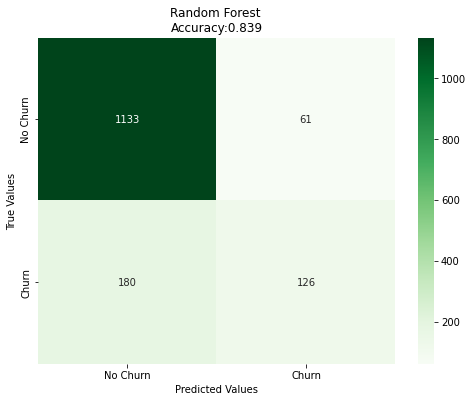

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Greens') 
plt.title('Random Forest \nAccuracy:{0:.3f}'\
          .format(accuracy_score(y_test, y_pred))) 
plt.ylabel('True Values') 
plt.xlabel('Predicted Values') 
plt.show()

### **Gradient Boosting**

Gradient boosting classifier works on the principle of boosting weak learners iteratively by shifting focus towards problematic observations that were difficult to predict in previous iterations and performing an ensemble of weak learners, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, but generalizes them by allowing optimization of an arbitrary differentiable loss function.

Gradient boosting steps:
  1. fit the model on observations producing $P_0$% accuracy; the remaining unexplained variance is captured in the error term: $Y = F(x) + error$
  2. fit another model on the error term to pull the extra explanatory component and add it to the original model, which should improve the overall accuracy: $error = G(x) + error2$
  3. the model will improve to $P_1$% accuracy and the equation looks as follows: $Y = F(x) + G(x) + error2$
  4. continue this method one more time to fit a model on the $error2$ component to extract a further explanatory component: $error2 = H(x) + error3$
  5. model accuracy is again improved to $P_2$% and the final model equation looks as follows: $Y = F(x) + G(x) + H(x) + error3$
  6. Gradient boosting improves results further by using weighted average (higher importance given to better models that predict results with greater accuracy than others) $Y = a*G(x) + B*G(x) + 𝛶*H(x) + error4$

Gradient boosting involves three elements:
 * Loss function to be optimized: Loss function depends on the type of problem being solved. In the case of regression problems, mean squared error is used, and in classification problems, logarithmic loss will be used. In boosting, at each stage, unexplained loss from prior iterations will be optimized rather than starting from scratch.
 * Weak learner to make predictions: Decision trees are used as a weak learner in gradient boosting.
 * Additive model to add weak learners to minimize the loss function: Trees are added one at a time and existing trees in the model are not changed. The gradient descent procedure is used to minimize the loss when adding trees.

Gradient Boosting Algorithm:
 1. Initialize: initializes the constant optimal constant model, which is just a single terminal node that will be utilized as a starting point to tune it further in next steps. $f_0(x) = argmin_y \sum^{N}_{i=1}L(y_i,𝛶)$
 2. For m = 1 to M:
  * For i = 1, 2, …, N compute: calculate the residuals/errors by comparing actual outcome with predicted results $ 𝑟_{im} = -[\frac{∂L(y_i,f(x_i))}{∂f(x_i)} ]f = f_{m-1}$
  * Fit a regression tree to the targets $r_{im}$ giving terminal regions $R_{jm}$, $j$ = 1, 2, …, $J_m$: the next decision tree will be fitted on error terms to bring in more explanatory power to the model. 
  * For $j$ = 1, 2, …, $J_m$, compute: the next decision tree will be fitted on error terms to bring in more explanatory power to the model $ 𝛶_{jm} = argmin_{𝛶} \sum_{x_i \in R_{jm}} L(y_i, f_{m-1}(x_i)+𝛶) $
  * d) Update: add the extra component to the model at last iteration. $ f_m(x) = f_{m-1}(x) + ∑^{J_m}_{j=1} 𝛶_{jm}I(x \in R_{jm}) $
 3. Output: ensemble all weak learners to create a strong learner. $ \hat{f}(x) = f_m(x) $ 


In [ ]:
GB_churn = GradientBoostingClassifier(n_estimators=80)

In [ ]:
GB_churn.fit(X_train[top5_features],y_train)

GradientBoostingClassifier(n_estimators=80)

In [ ]:
y_pred2=GB_churn.predict(X_test[top5_features])

In [ ]:
target_names = ['No Churn', 'Churn']
print(classification_report(y_test, y_pred2, target_names=target_names)) 

              precision    recall  f1-score   support

    No Churn       0.87      0.94      0.90      1194
       Churn       0.66      0.43      0.52       306

    accuracy                           0.84      1500
   macro avg       0.76      0.69      0.71      1500
weighted avg       0.82      0.84      0.82      1500



In [ ]:
cm2 = confusion_matrix(y_test, y_pred2)

cm_df2 = pd.DataFrame(cm, index = ['No Churn','Churn'], columns = ['No Churn','Churn'])

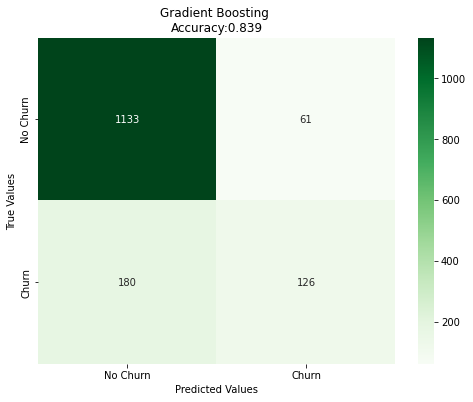

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df2, annot=True,fmt='g',cmap='Greens') 
plt.title('Gradient Boosting \nAccuracy:{0:.3f}'\
          .format(accuracy_score(y_test, y_pred2))) 
plt.ylabel('True Values') 
plt.xlabel('Predicted Values') 
plt.show()

# ROC Curve

In [ ]:
from sklearn.metrics import roc_curve,auc

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred2, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

In [ ]:
thresholds

array([2, 1, 0], dtype=int8)

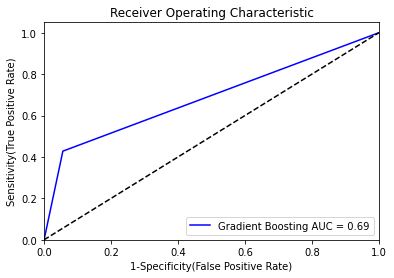

In [ ]:
plt.figure() 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, label='%s AUC = %0.2f' % \
         ('Gradient Boosting', roc_auc),color="blue") 
plt.plot([0, 1], [0, 1],'k--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.ylabel('Sensitivity(True Positive Rate)') 
plt.xlabel('1-Specificity(False Positive Rate)') 
plt.title('Receiver Operating Characteristic') 
plt.legend(loc="lower right") 
plt.show()

The best model tested on this data is Gradient Boosting. The F1-score shows predicting no churn has a higher accuracy than predicting churn. The top four predictive features are age, estimated salary, credit score and balance. These features can be used by the bank to target potential churners.

# Save model

In [ ]:
import joblib

In [ ]:
# Save model to Drive

joblib.dump(GB_churn,'/content/drive/MyDrive/Marketing-Analytics/Models/GB_churn.joblib')

['/content/drive/MyDrive/Marketing-Analytics/Models/GB_churn.joblib']